In [1]:
# Add the shared code directory to the module search path
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'shared_code')))

from pauli_channel_approximation import PCA

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
import dill
data = {'sparsity':{}, 'agi':{}}
sample_values = [0,.1, .01, .001, .0001]
for ind, eta in enumerate(sample_values):
    with open(f'sparsity{ind}.pkl', 'rb') as f:
        data['sparsity'][eta] = dill.load(f)
    with open(f'agi{ind}.pkl', 'rb') as f:
        data['agi'][eta] = dill.load(f)

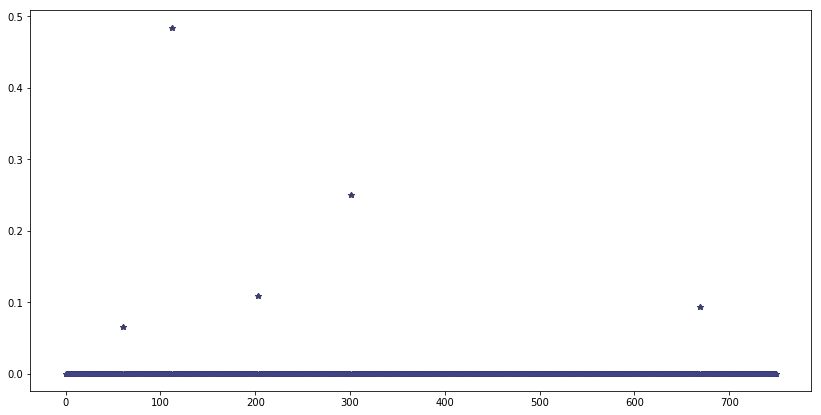

In [4]:
plt.figure(figsize=(14,7))
for ind,eta in enumerate(sample_values):
    plt.plot(np.arange(750), data['agi'][eta]['weights'][0].T.tolist()[0], 
             '*', color=f'#{ind}{ind}{ind}{ind}{2*ind}{2*ind}', alpha=.5)

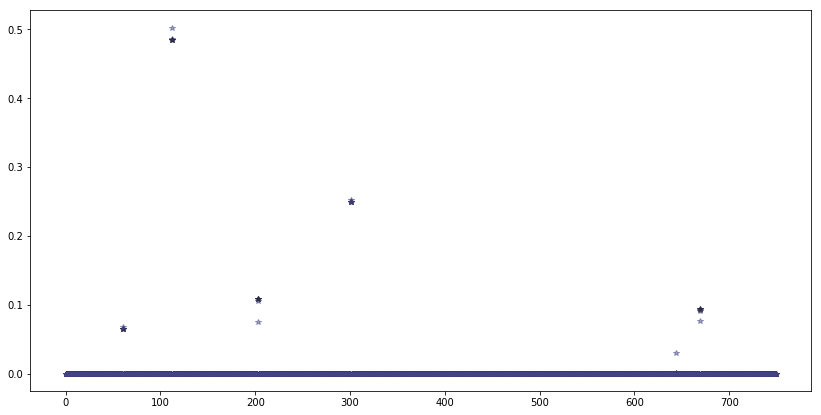

In [5]:
plt.figure(figsize=(14,7))
for ind,eta in enumerate(sample_values):
    plt.plot(np.arange(750), data['sparsity'][eta]['weights'][0].T.tolist()[0], 
             '*', color=f'#{ind}{ind}{ind}{ind}{2*ind}{2*ind}', alpha=.5)

In [95]:
for ind,eta in enumerate(sample_values):
    weights = np.array(data['agi'][eta]['weights'][0].T.tolist()[0])
    print(data['agi'][eta]['param'], list(zip(np.round(weights[weights>0.02],3), np.where(weights > 0.02)[0])))
    

0 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.0001 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.001 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.01 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.1 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]


In [94]:
for ind,eta in enumerate(sample_values):
    weights = np.array(data['sparsity'][eta]['weights'][0].T.tolist()[0])
    print(data['sparsity'][eta]['param'], list(zip(np.round(weights[weights>0.02],3), np.where(weights > 0.02)[0])))
    

0 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.0001 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.001 [(0.065, 61), (0.485, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.01 [(0.064, 61), (0.486, 112), (0.106, 203), (0.253, 301), (0.091, 669)]
0.1 [(0.067, 61), (0.503, 112), (0.075, 203), (0.25, 301), (0.029, 644), (0.076, 669)]
